In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from IPython.display import Image

%matplotlib inline

In [2]:
df = pd.read_csv (r'M:\DOKUMENTY\STUDIA\PK\WIiT\II\MOW2\lab\Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130.0,80.0,15.0,98.0,86,high risk
1,35.0,140.0,90.0,13.0,98.0,70,high risk
2,29.0,90.0,70.0,8.0,100.0,80,high risk
3,30.0,140.0,85.0,7.0,98.0,70,high risk
4,35.0,120.0,60.0,6.1,98.0,76,low risk


In [3]:
print(df)

       Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     25.0       130.0         80.0  15.00      98.0         86  high risk
1     35.0       140.0         90.0  13.00      98.0         70  high risk
2     29.0        90.0         70.0   8.00     100.0         80  high risk
3     30.0       140.0         85.0   7.00      98.0         70  high risk
4     35.0       120.0         60.0   6.10      98.0         76   low risk
5     23.0         NaN         80.0   7.01      98.0         70  high risk
6     23.0       130.0         70.0   7.01      98.0         78   mid risk
7     35.0        85.0         60.0  11.00     102.0         86  high risk
8     32.0       120.0         90.0   6.90      98.0         70   mid risk
9     42.0       130.0         80.0  18.00      98.0         70  high risk
10    23.0        90.0         60.0   7.01      98.0         76   low risk
11    19.0       120.0         80.0   7.00      98.0         70   mid risk
12    25.0       110.0   

dane zawierają brakujące wartości, a poziom ryzyka musi zostać zmapowany na wartości liczbowe, ponieważ tylko takie można poddać klasyfikacji

In [4]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1004.000000,1002.000000,1004.000000,1000.000000,1014.000000,1014.000000
mean,29.802789,113.096806,76.450199,8.712940,98.665089,74.301775
std,13.458216,18.399214,13.928979,3.286107,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,99.250000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


W przypadku danych dotyczących tętna prawdopodobnie wartość 7 (min) jest wartością odstającą. Możliwe, ze w przypadku poziomu cukru we krwi wartość 19(max) również będzie pominięta w dalszej analizie.

# Zmiana na wartości liczbowe

In [5]:
for i in range(len(df['RiskLevel'])):
    if df['RiskLevel'][i] == "low risk":
        df['RiskLevel'][i] = int(0)
    elif df['RiskLevel'][i] == "mid risk":
        df['RiskLevel'][i] = int(1)
    elif df['RiskLevel'][i] == "high risk":
        df['RiskLevel'][i] = int(2)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

zamiana na wartości liczbowe odpowiadające poziomowi ryzyka śmierci kobiet w ciąży

In [6]:
df = df.astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
Age            1004 non-null float64
SystolicBP     1002 non-null float64
DiastolicBP    1004 non-null float64
BS             1000 non-null float64
BodyTemp       1014 non-null float64
HeartRate      1014 non-null float64
RiskLevel      1014 non-null float64
dtypes: float64(7)
memory usage: 55.5 KB


Zmapowanie wszystkich cech na jeden typ danych

In [8]:
df.head(n=10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130.0,80.0,15.00,98.0,86.0,2.0
1,35.0,140.0,90.0,13.00,98.0,70.0,2.0
2,29.0,90.0,70.0,8.00,100.0,80.0,2.0
3,30.0,140.0,85.0,7.00,98.0,70.0,2.0
4,35.0,120.0,60.0,6.10,98.0,76.0,0.0
5,23.0,NaN,80.0,7.01,98.0,70.0,2.0
6,23.0,130.0,70.0,7.01,98.0,78.0,1.0
7,35.0,85.0,60.0,11.00,102.0,86.0,2.0
8,32.0,120.0,90.0,6.90,98.0,70.0,1.0
9,42.0,130.0,80.0,18.00,98.0,70.0,2.0


# Dystrybucja klas

In [9]:
def class_distr(df):
    
    count0 = 0
    count1 = 0
    count2 = 0


    for i in df["RiskLevel"]:
        if i == 0: 
            count0 += 1 
        if i == 1: 
            count1 += 1 
        if i == 2: 
            count2 += 1 
   
    print("Zeros: ", round((count0/len(df["RiskLevel"] ))*100)," %")
    print("Ones: ", round((count1/len(df["RiskLevel"] ))*100), " %")
    print("Twos: ", round((count2/len(df["RiskLevel"] ))*100), "%")
    
    df_temp = pd.DataFrame({"class":[count0, count1, count2]})
    df_temp.plot.bar(rot=0)
    plt. title("Class distribution")
    plt.ylabel('Frequency')
    plt.xlabel('Class')
    plt.show()
    
    return [count0, count1, count2]

Zeros:  40  %
Ones:  33  %
Twos:  27 %


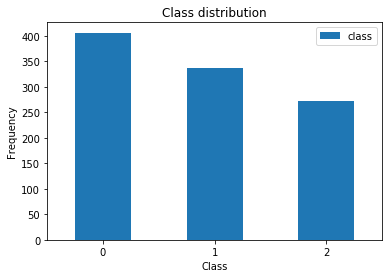

[406, 336, 272]

In [10]:
class_distr(df)

# Brakujące dane

In [11]:
df.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


tam gdzie jest True brakuje danych 

In [12]:
df.isnull().sum()

Age            10
SystolicBP     12
DiastolicBP    10
BS             14
BodyTemp        0
HeartRate       0
RiskLevel       0
dtype: int64

zliczenie brakujących danych 

In [13]:
df = df.dropna(thresh = 6)

In [14]:
df.isnull().sum()

Age             9
SystolicBP     10
DiastolicBP    10
BS             13
BodyTemp        0
HeartRate       0
RiskLevel       0
dtype: int64

dozwolona jest najwyżej jedna brakująca wartość.

# Wstawianie brakujących danych

## Srednia

In [15]:
df_mean = df.copy()
df_mean['Age']=df_mean['Age'].fillna(round(df_mean['Age'].mean()))
df_mean['SystolicBP']=df_mean['SystolicBP'].fillna(round(df_mean['SystolicBP'].mean()))
df_mean['DiastolicBP']=df_mean['DiastolicBP'].fillna(round(df_mean['DiastolicBP'].mean()))
df_mean['BS']=df_mean['BS'].fillna(round(df_mean['BS'].mean()))

Brakujące dane wypełniono obliczając średnią dla każdej cechy, dla której dane takie istnieją

In [16]:
df_mean.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [17]:
df.isnull().sum()  
# sprawdzenie czy nie zmienil sie oryginalny zbior

Age             9
SystolicBP     10
DiastolicBP    10
BS             13
BodyTemp        0
HeartRate       0
RiskLevel       0
dtype: int64

In [18]:
print(df_mean)

       Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     25.0       130.0         80.0  15.00      98.0       86.0        2.0
1     35.0       140.0         90.0  13.00      98.0       70.0        2.0
2     29.0        90.0         70.0   8.00     100.0       80.0        2.0
3     30.0       140.0         85.0   7.00      98.0       70.0        2.0
4     35.0       120.0         60.0   6.10      98.0       76.0        0.0
5     23.0       113.0         80.0   7.01      98.0       70.0        2.0
6     23.0       130.0         70.0   7.01      98.0       78.0        1.0
7     35.0        85.0         60.0  11.00     102.0       86.0        2.0
8     32.0       120.0         90.0   6.90      98.0       70.0        1.0
9     42.0       130.0         80.0  18.00      98.0       70.0        2.0
10    23.0        90.0         60.0   7.01      98.0       76.0        0.0
11    19.0       120.0         80.0   7.00      98.0       70.0        1.0
12    25.0       110.0   

In [19]:
df_mean.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,29.809289,113.095850,76.418972,8.717826,98.666403,74.290514,0.867589
std,13.404024,18.307995,13.853564,3.266482,1.372421,8.092724,0.806905
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.500000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,38.250000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


Analiza danych potwierdza, że jest tyle samo rekordów.

## Mediana


In [20]:
df_median = df.copy()
df_median['Age']=df_median['Age'].fillna(round(df_median['Age'].median()))
df_median['SystolicBP']=df_median['SystolicBP'].fillna(round(df_median['SystolicBP'].median()))
df_median['DiastolicBP']=df_median['DiastolicBP'].fillna(round(df_median['DiastolicBP'].median()))
df_median['BS']=df_median['BS'].fillna(round(df_median['BS'].median()))

In [21]:
df_median.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [22]:
df.isnull().sum()  
# sprawdzenie czy nie zmienil sie oryginalny zbior

Age             9
SystolicBP     10
DiastolicBP    10
BS             13
BodyTemp        0
HeartRate       0
RiskLevel       0
dtype: int64

In [23]:
print(df_median)

       Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
0     25.0       130.0         80.0  15.00      98.0       86.0        2.0
1     35.0       140.0         90.0  13.00      98.0       70.0        2.0
2     29.0        90.0         70.0   8.00     100.0       80.0        2.0
3     30.0       140.0         85.0   7.00      98.0       70.0        2.0
4     35.0       120.0         60.0   6.10      98.0       76.0        0.0
5     23.0       120.0         80.0   7.01      98.0       70.0        2.0
6     23.0       130.0         70.0   7.01      98.0       78.0        1.0
7     35.0        85.0         60.0  11.00     102.0       86.0        2.0
8     32.0       120.0         90.0   6.90      98.0       70.0        1.0
9     42.0       130.0         80.0  18.00      98.0       70.0        2.0
10    23.0        90.0         60.0   7.01      98.0       76.0        0.0
11    19.0       120.0         80.0   7.00      98.0       70.0        1.0
12    25.0       110.0   

In [24]:
df_median.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,29.764822,113.165020,76.458498,8.704980,98.666403,74.290514,0.867589
std,13.411616,18.320734,13.858022,3.267314,1.372421,8.092724,0.806905
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,38.250000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


Analiza danych potwierdza, że jest tyle samo rekordów.

## Regresja

In [25]:
reg = linear_model.LinearRegression()
df_regression = df.copy()

### AGE

In [26]:
test_data_Age = df_regression[df_regression['Age'].isnull()]
print(test_data_Age)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
50    NaN       120.0         80.0   7.0      98.0       66.0        0.0
256   NaN       120.0         80.0   6.9      98.0       80.0        0.0
292   NaN       120.0         60.0   6.1      98.0       76.0        0.0
386   NaN       120.0         80.0   7.8      98.0       70.0        0.0
479   NaN       120.0         80.0   7.9      98.0       70.0        0.0
553   NaN       120.0         85.0  15.0      98.0       60.0        1.0
1003  NaN       130.0        100.0  16.0      98.0       76.0        2.0
1010  NaN       120.0         90.0  18.0      98.0       60.0        2.0
1013  NaN       120.0         65.0   6.0     101.0       76.0        1.0


stworzenie zbioru testowego


In [27]:
train_data_Age = df_regression.dropna(subset = ['Age'])
train_data_Age = train_data_Age.dropna(subset = ['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'])

stworzenie zbioru treningowego

In [28]:
print(train_data_Age.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [29]:
X_train_Age = train_data_Age.drop('Age', axis=1)

In [30]:
y_train_Age = train_data_Age['Age']

In [31]:
X_test_Age = test_data_Age.drop('Age', axis=1)

Podział na zmienne objaśniające (X) i objaśniane (y)

In [32]:
reg.fit(X_train_Age, y_train_Age)
predicted_Age = reg.predict(X_test_Age)
print(predicted_Age)

[ 28.58986384  30.05539302  26.56172061  30.10189758  30.23384893
  39.02872809  44.86736248  43.55465974  22.40261987]


In [33]:
df_regression.loc[df_regression['Age'].isnull(), 'Age'] = predicted_Age
print(df_regression)

            Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  \
0     25.000000       130.0         80.0  15.00      98.0       86.0   
1     35.000000       140.0         90.0  13.00      98.0       70.0   
2     29.000000        90.0         70.0   8.00     100.0       80.0   
3     30.000000       140.0         85.0   7.00      98.0       70.0   
4     35.000000       120.0         60.0   6.10      98.0       76.0   
5     23.000000         NaN         80.0   7.01      98.0       70.0   
6     23.000000       130.0         70.0   7.01      98.0       78.0   
7     35.000000        85.0         60.0  11.00     102.0       86.0   
8     32.000000       120.0         90.0   6.90      98.0       70.0   
9     42.000000       130.0         80.0  18.00      98.0       70.0   
10    23.000000        90.0         60.0   7.01      98.0       76.0   
11    19.000000       120.0         80.0   7.00      98.0       70.0   
12    25.000000       110.0         89.0   7.01      98.0       

### SYSTOLICBP

In [34]:
test_data_SystolicBP = df_regression[df_regression['SystolicBP'].isnull()]
print(test_data_SystolicBP)

train_data_SystolicBP   = df_regression.dropna(subset = ['SystolicBP'])
train_data_SystolicBP = train_data_SystolicBP.dropna(subset = ['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'])

print(train_data_SystolicBP.isnull().sum())

X_train_SystolicBP = train_data_SystolicBP.drop('SystolicBP', axis=1)
y_train_SystolicBP = train_data_SystolicBP['SystolicBP']
X_test_SystolicBP = test_data_SystolicBP.drop('SystolicBP', axis=1)

reg.fit(X_train_SystolicBP, y_train_SystolicBP)
predicted_SystolicBP = reg.predict(X_test_SystolicBP)
print(predicted_SystolicBP)

df_regression.loc[df_regression['SystolicBP'].isnull(), 'SystolicBP'] = predicted_SystolicBP
print(df_regression)

      Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate  RiskLevel
5    23.0         NaN         80.0   7.01      98.0       70.0        2.0
20   40.0         NaN        100.0  18.00      98.0       90.0        2.0
46   42.0         NaN         80.0   7.50      98.0       70.0        0.0
137  55.0         NaN         95.0  19.00      98.0       77.0        2.0
187  35.0         NaN         70.0   6.10      98.0       66.0        0.0
220  29.0         NaN         70.0   6.70      98.0       78.0        1.0
222  32.0         NaN         90.0   6.40      98.0       70.0        0.0
418  12.0         NaN         90.0   6.80      98.0       80.0        1.0
557  55.0         NaN         65.0   7.50      98.0       66.0        0.0
843  17.0         NaN         60.0   9.00     102.0       86.0        1.0
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
[ 120.98923983  139.8960829   115.68656052  137.701540

### DIASTOLICBP

In [35]:
test_data_DiastolicBP = df_regression[df_regression['DiastolicBP'].isnull()]
print(test_data_DiastolicBP)

train_data_DiastolicBP  = df_regression.dropna(subset = ['DiastolicBP'])
train_data_DiastolicBP = train_data_DiastolicBP.dropna(subset = ['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'])

print(train_data_DiastolicBP.isnull().sum())

X_train_DiastolicBP = train_data_DiastolicBP.drop('DiastolicBP', axis=1)
y_train_DiastolicBP = train_data_DiastolicBP['DiastolicBP']
X_test_DiastolicBP = test_data_DiastolicBP.drop('DiastolicBP', axis=1)

reg.fit(X_train_DiastolicBP, y_train_DiastolicBP)
predicted_DiastolicBP = reg.predict(X_test_DiastolicBP)
print(predicted_DiastolicBP)

df_regression.loc[df_regression['DiastolicBP'].isnull(), 'DiastolicBP'] = predicted_DiastolicBP
print(df_regression)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
143  25.0       120.0          NaN   6.7     101.0       80.0        1.0
188  22.0       120.0          NaN   6.1      98.0       88.0        0.0
223  42.0       120.0          NaN   6.4      98.0       70.0        0.0
254  55.0       110.0          NaN   6.9      98.0       88.0        0.0
289  50.0       120.0          NaN   7.7      98.0       70.0        0.0
437  29.0        90.0          NaN  10.0      98.0       80.0        2.0
613  27.0       135.0          NaN   7.5     101.0       86.0        2.0
799  30.0       120.0          NaN   6.8      98.0       70.0        1.0
929  16.0       100.0          NaN   7.5      98.0       80.0        0.0
972  50.0       120.0          NaN  15.0      98.0       70.0        2.0
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
[ 78.16470564  77.48726649  80.15167637  74.11917745  81.09708677

### BS

In [36]:
test_data_BS = df_regression[df_regression['BS'].isnull()]
print(test_data_BS)

train_data_BS = df_regression.dropna(subset = ['BS'])
train_data_BS = train_data_BS.dropna(subset = ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate', 'RiskLevel'])

print(train_data_BS.isnull().sum())


X_train_BS = train_data_BS.drop('BS', axis=1)
y_train_BS = train_data_BS['BS']
X_test_BS = test_data_BS.drop('BS', axis=1)

reg.fit(X_train_BS, y_train_BS)
predicted_BS = reg.predict(X_test_BS)
print(predicted_BS)

df_regression.loc[df_regression['BS'].isnull(), 'BS'] = predicted_BS
print(df_regression)

       Age  SystolicBP  DiastolicBP  BS  BodyTemp  HeartRate  RiskLevel
17    25.0       140.0        100.0 NaN      98.0       80.0        2.0
77    55.0       120.0         90.0 NaN      98.0       70.0        1.0
159   25.0       100.0         90.0 NaN      98.0       76.0        0.0
311   35.0        90.0         65.0 NaN      98.0       75.0        0.0
348   17.0       110.0         75.0 NaN     101.0       76.0        2.0
383   28.0       115.0         60.0 NaN     101.0       86.0        1.0
413   50.0       130.0         80.0 NaN     102.0       76.0        1.0
440   23.0       140.0         90.0 NaN      98.0       70.0        2.0
482   50.0       140.0         95.0 NaN      98.0       60.0        2.0
516   18.0        85.0         60.0 NaN     101.0       86.0        1.0
720   19.0       120.0         80.0 NaN      98.0       70.0        1.0
1001  60.0       120.0         85.0 NaN      98.0       60.0        2.0
1008  48.0       120.0         80.0 NaN      98.0       88.0    

In [37]:
df_regression.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [38]:
df.isnull().sum()  
# sprawdzenie czy nie zmienil sie oryginalny zbior

Age             9
SystolicBP     10
DiastolicBP    10
BS             13
BodyTemp        0
HeartRate       0
RiskLevel       0
dtype: int64

In [39]:
df_regression.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,29.834383,113.138084,76.432364,8.730163,98.666403,74.290514,0.867589
std,13.424925,18.368478,13.869543,3.277404,1.372421,8.092724,0.806905
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


# Histogram

## dla mean

Age


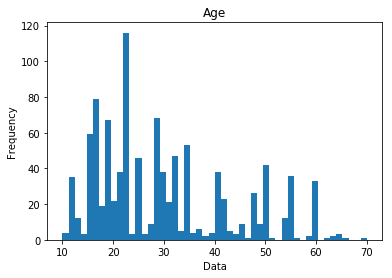

SystolicBP


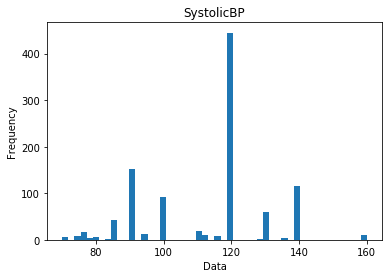

DiastolicBP


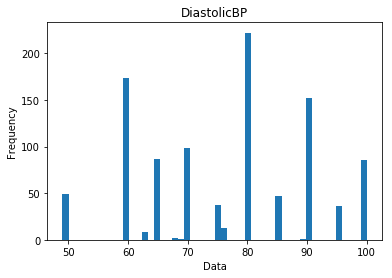

BS


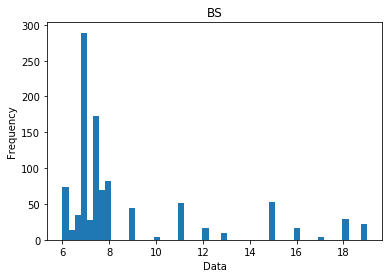

BodyTemp


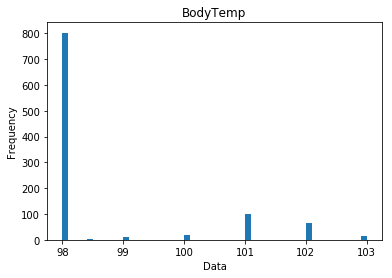

HeartRate


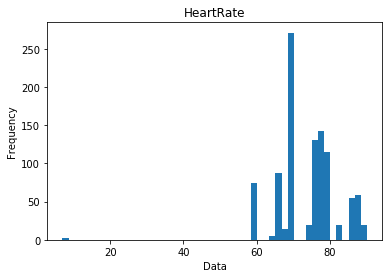

RiskLevel


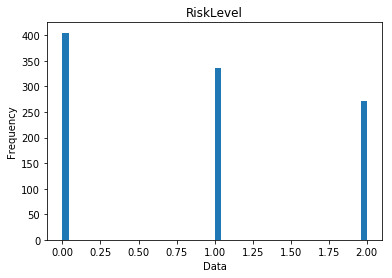

In [40]:
for col in df_mean.columns:
    print(col)
    plt.hist(np.array(df_mean[col]), bins=50)
    plt. title(col)
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()

histogram tętna potwierdza, że 7 nadaje się do odrzucenia ze względu na to, że jest daną odstającą - wygląda na to, że to błąd. Reszta danych raczej nie zostanie odrzucona przy dalszej analizie.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001608F209748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001608F23EB00>]], dtype=object)

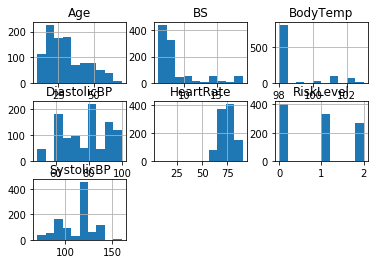

In [41]:
df_mean.hist()

## dla median

Age


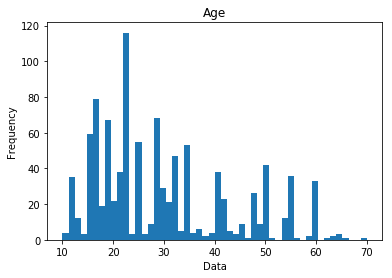

SystolicBP


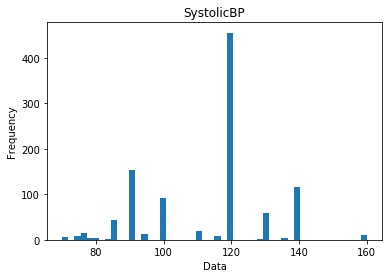

DiastolicBP


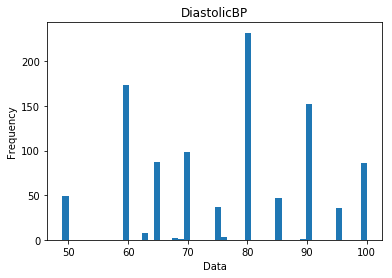

BS


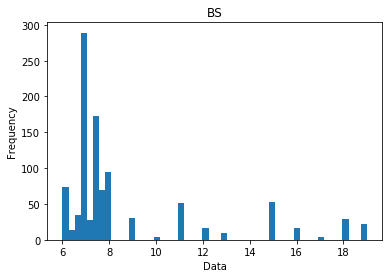

BodyTemp


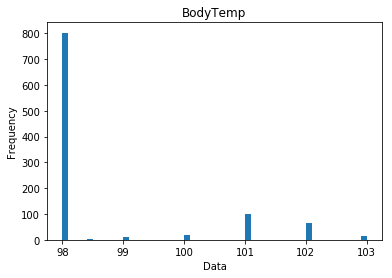

HeartRate


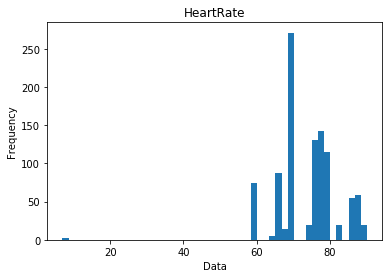

RiskLevel


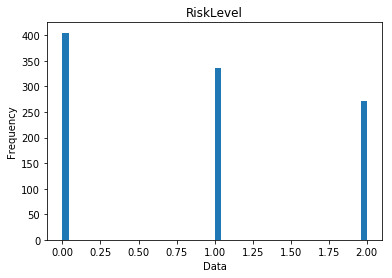

In [42]:
for col in df_median.columns:
    print(col)
    plt.hist(np.array(df_median[col]), bins=50)
    plt. title(col)
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001608FB37EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001608FB119B0>]], dtype=object)

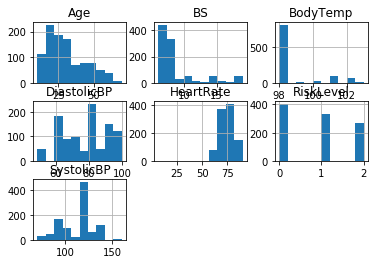

In [43]:
df_median.hist()

## dla regresji

Age


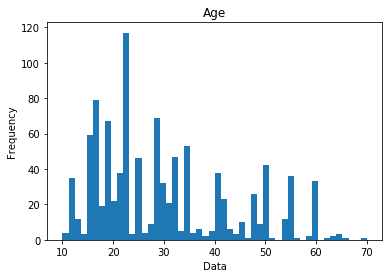

SystolicBP


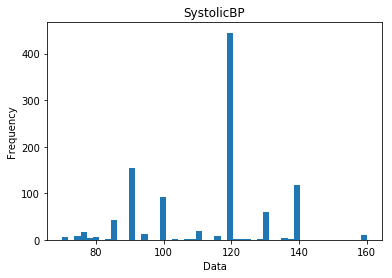

DiastolicBP


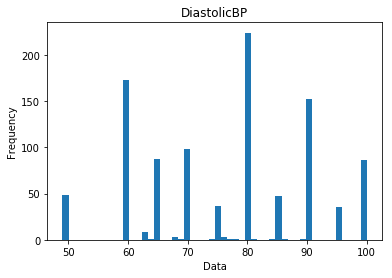

BS


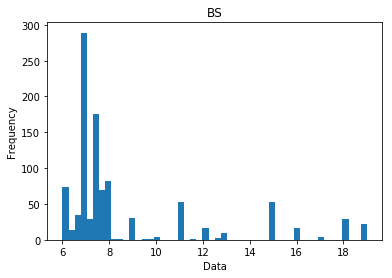

BodyTemp


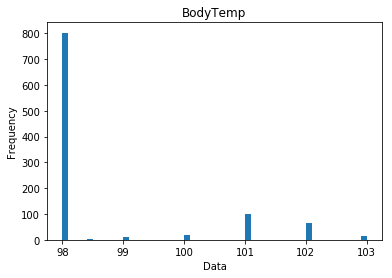

HeartRate


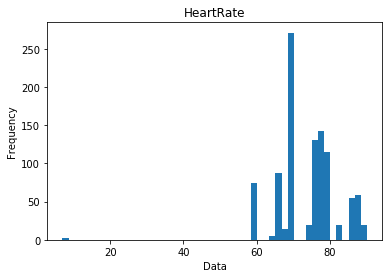

RiskLevel


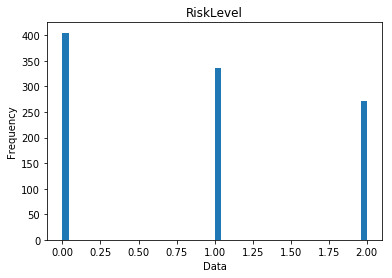

In [44]:
for col in df_regression.columns:
    print(col)
    plt.hist(np.array(df_regression[col]), bins=50)
    plt. title(col)
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001608F91B5C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001609001E208>]], dtype=object)

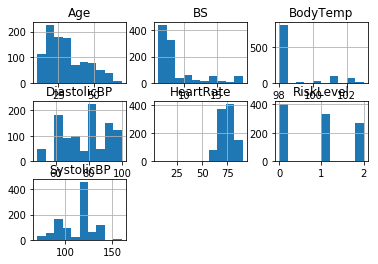

In [45]:
df_regression.hist()

# Korelacje

## dla mean

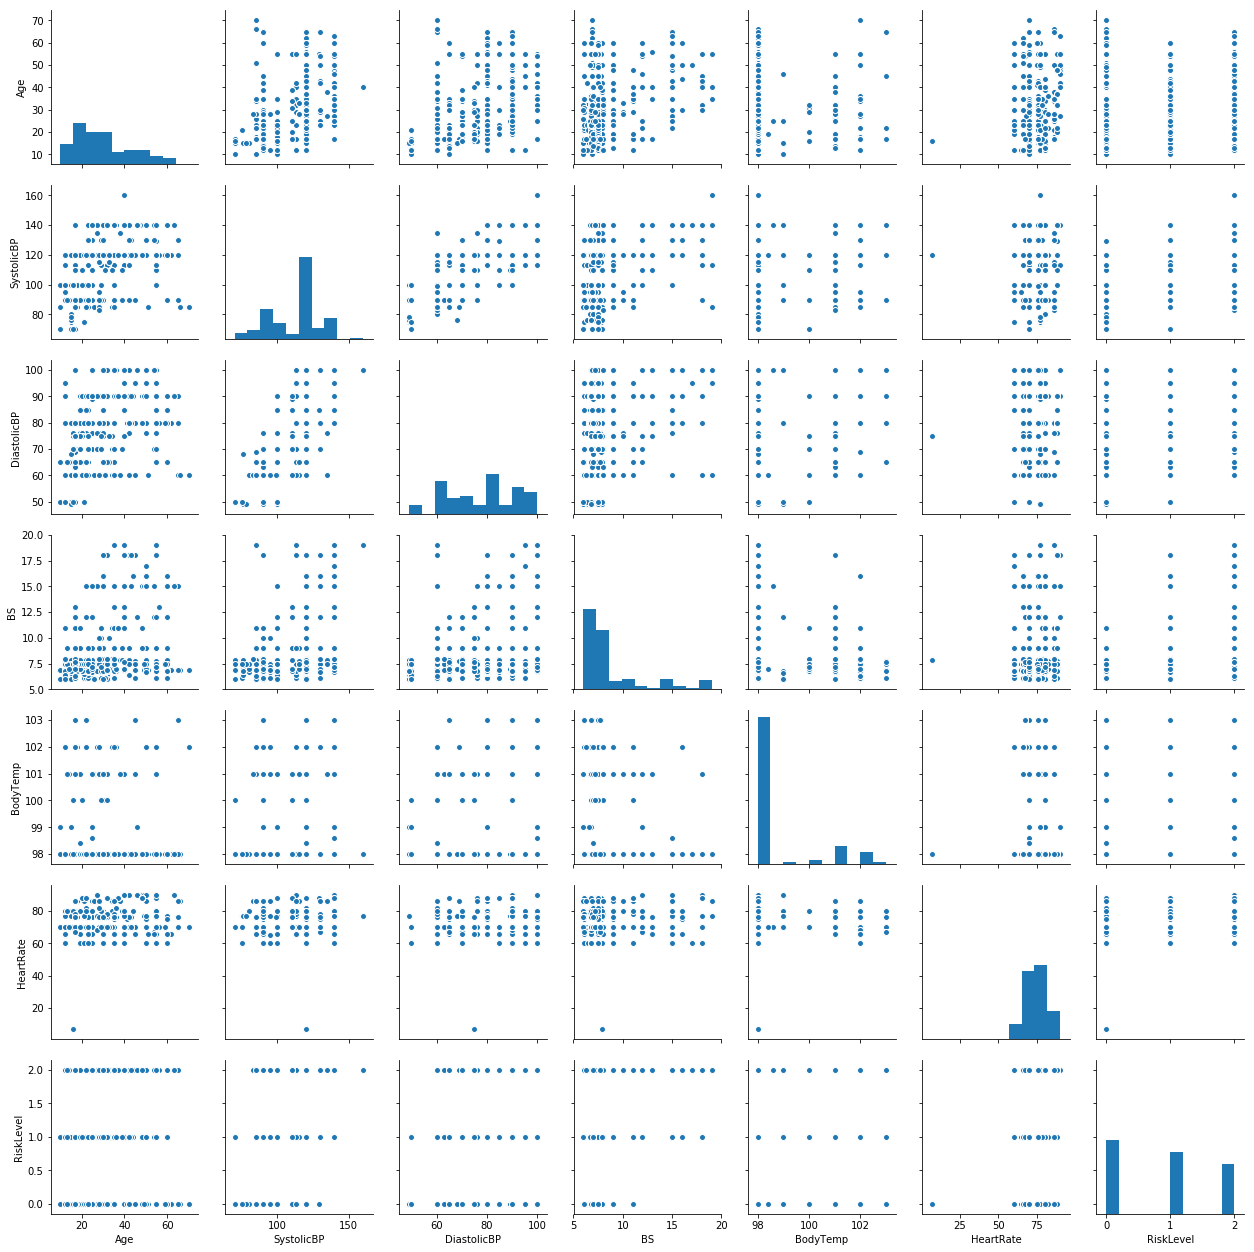

In [46]:
sns.pairplot(df_mean)

Dane, które mogą potencjalnie być od siebie w jakiś sposób liniowo zależne to: rozkurczowe i skurczowe cisnienie krwi, co nie jest zaskoczeniem.

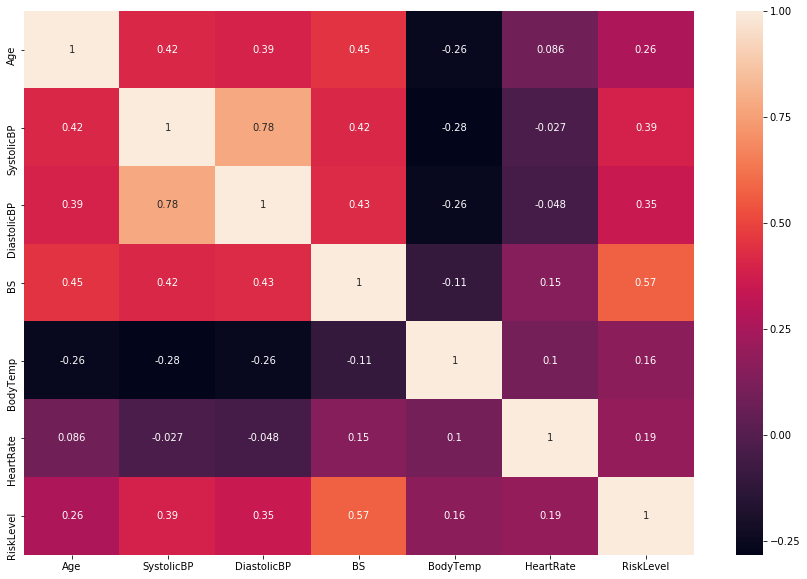

In [47]:
plt.figure(figsize = (15,10))
c_m = df_mean.corr()
sns.heatmap(c_m, annot=True)

występują korelacje ujemne, największy wpływ na ryzyko śmierci ma poziom cukru we krwi, najmniejszy - temperatura ciała.

Występują też dosyć wysokie korelacje między wiekiem a: rozkurczowym ciśnieniem krwi, skurczowym cisnieniem krwi i pziomem cukru we krwi; i między poziomem cukru a: wiekiem, rozkurczowym ciśnieniem krwi, skurczowym cisnieniem krwi. 

Największa korelacja (poza cechami samymi ze sobą) to korelacja między rozkurczowym ciśnieniem krwi a skurczowym cisnieniem krwi, co zostało już wykazane wcześniej.

## dla median

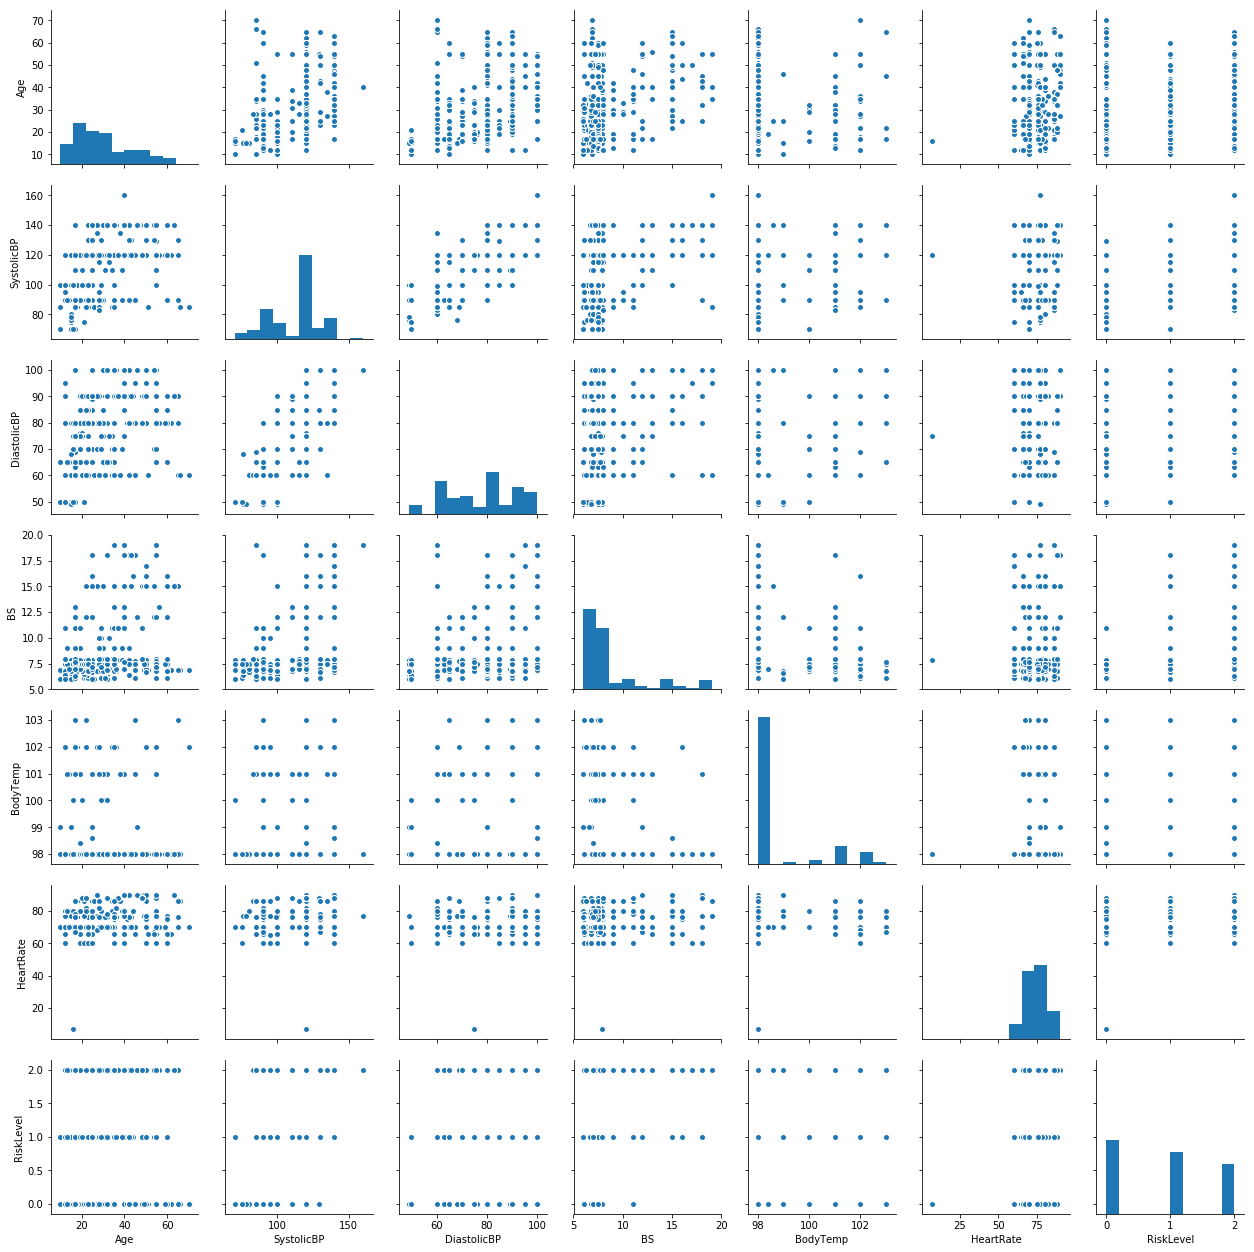

In [48]:
sns.pairplot(df_median)

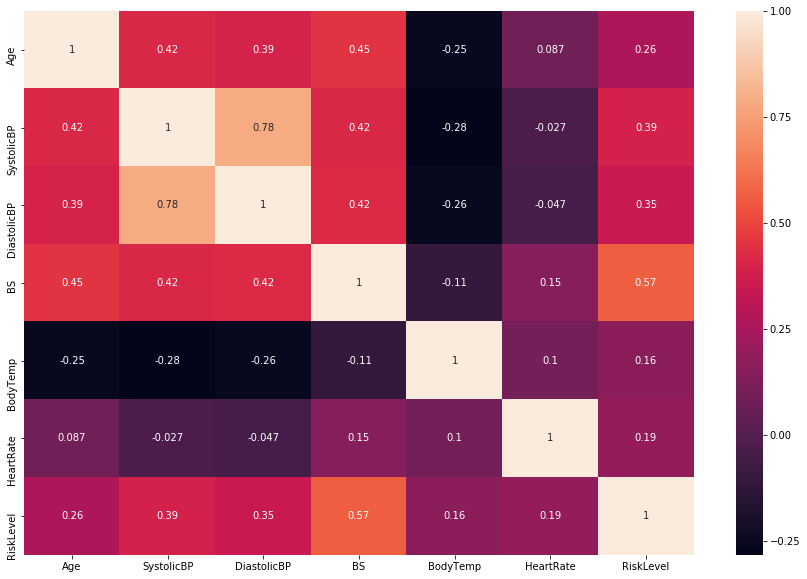

In [49]:
plt.figure(figsize = (15,10))
c_m = df_median.corr()
sns.heatmap(c_m, annot=True)

## dla regresji

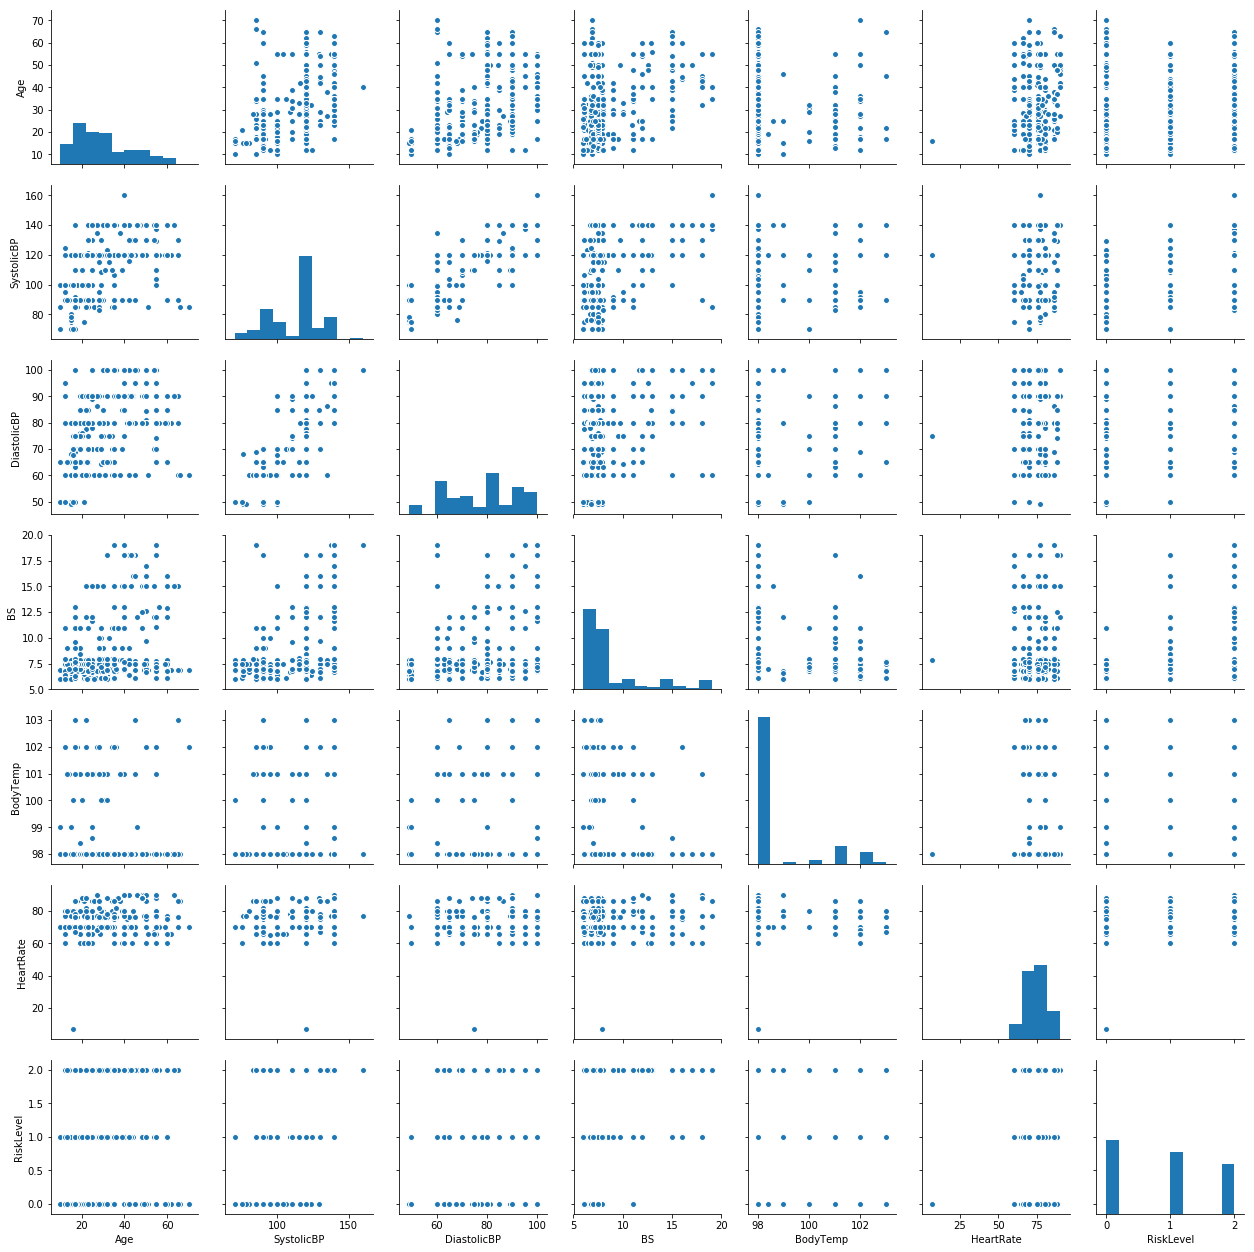

In [50]:
sns.pairplot(df_regression)

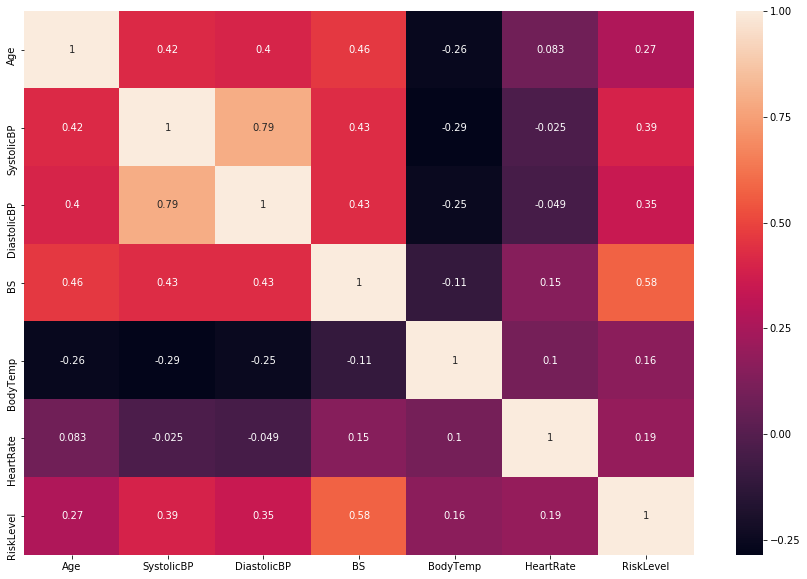

In [51]:
plt.figure(figsize = (15,10))
c_m = df_regression.corr()
sns.heatmap(c_m, annot=True)


# Analiza danych odstających

## mean

Age


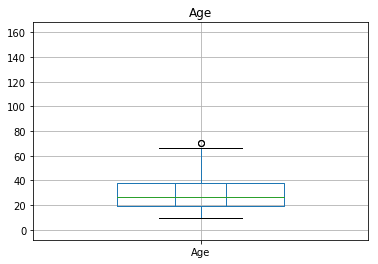

SystolicBP


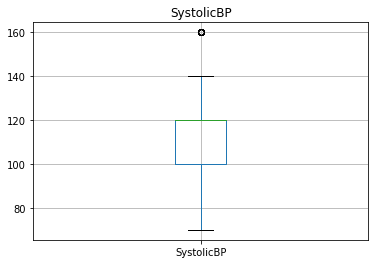

DiastolicBP


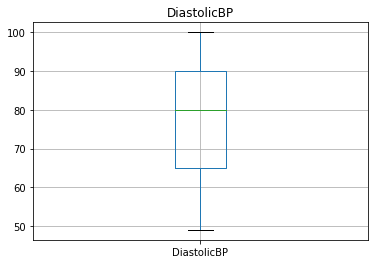

BS


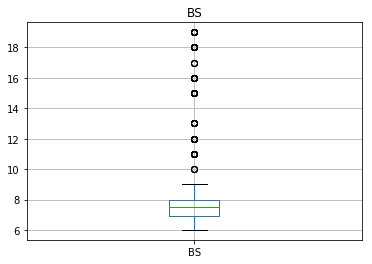

BodyTemp


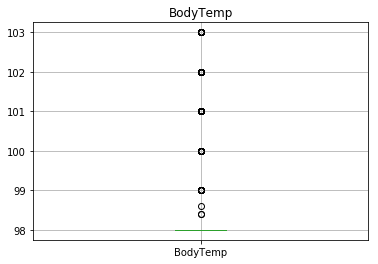

HeartRate


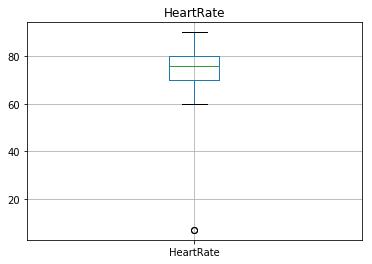

In [52]:
df_mean.boxplot()

for col in df_mean.columns:
    if col != 'RiskLevel':
        print(col)
        pd.DataFrame(df_mean[col]).boxplot()
        plt. title(col)
        plt.show()

Potwierdzenie odstajacych danych dotyczących tętna. Pojawiają się odstające dane w pomiarach temperatury ciała i poziomu cukru we krwi, jednak po analizie i interpretacji danych, nie zostaną one usunięte, ponieważ nie wyglądają na błąd. Mogą być istotne jako dane medyczne odbiegające od normy i powodujące wysokie ryzyko śmierci.

## median

Age


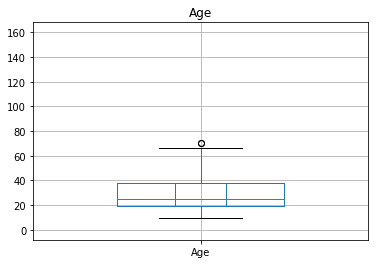

SystolicBP


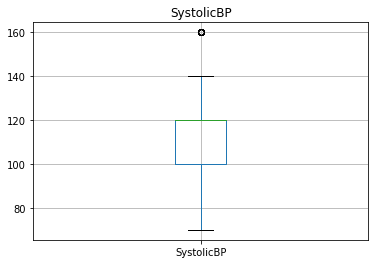

DiastolicBP


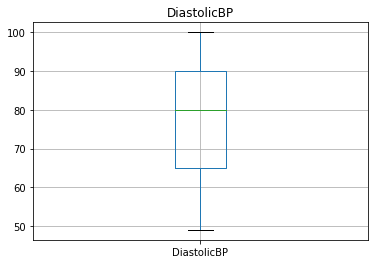

BS


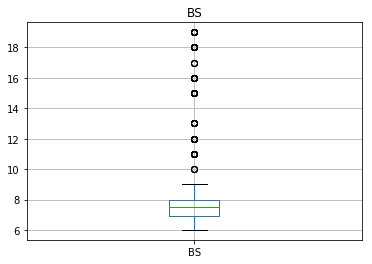

BodyTemp


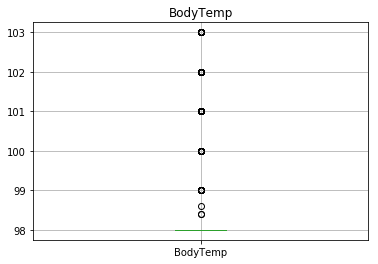

HeartRate


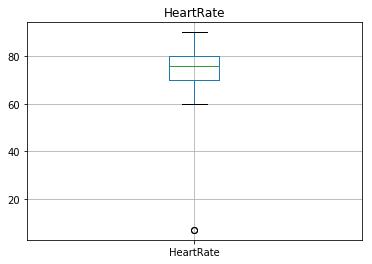

In [53]:
df_median.boxplot()

for col in df_median.columns:
    if col != 'RiskLevel':
        print(col)
        pd.DataFrame(df_median[col]).boxplot()
        plt. title(col)
        plt.show()

## regression

Age


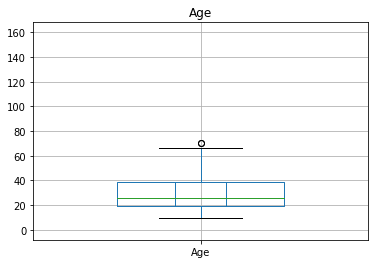

SystolicBP


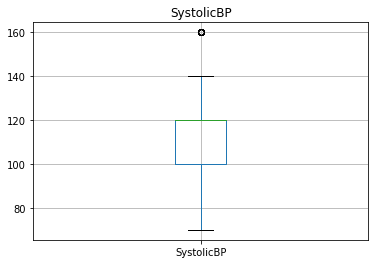

DiastolicBP


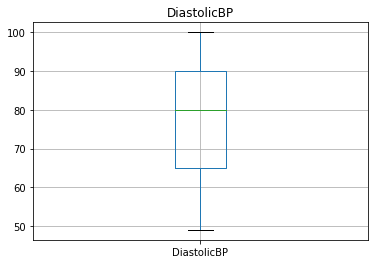

BS


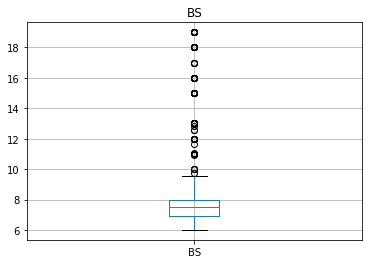

BodyTemp


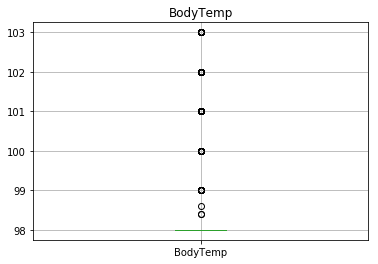

HeartRate


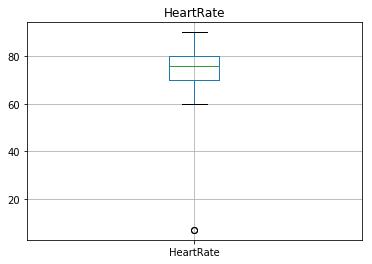

In [54]:
df_regression.boxplot()

for col in df_regression.columns:
    if col != 'RiskLevel':
        print(col)
        pd.DataFrame(df_regression[col]).boxplot()
        plt. title(col)
        plt.show()

# Skalowanie min-max

In [55]:
# scaler = MinMaxScaler()
# scaler.fit(df)
# df_min_max = scaler.transform(df)

# print(df_min_max)

# df_min_max = pd.DataFrame(df_min_max, columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
# df_min_max.head()

In [56]:
def min_max_scaler (dataFrame, new_min, new_max):
    min_max = dataFrame.copy()
    for col in min_max.columns:
        if col != 'RiskLevel':
            min_max[col] = ((min_max[col] - min(min_max[col]))/(max(min_max[col]) - min(min_max[col]))) * (new_max - new_min) + new_min
            
    return min_max

## mean

In [57]:
df_mean_min_max = min_max_scaler(df_mean, 0, 1)
print(df_mean_min_max)

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0     0.250000    0.666667     0.607843  0.692308       0.0   0.951807   
1     0.416667    0.777778     0.803922  0.538462       0.0   0.759036   
2     0.316667    0.222222     0.411765  0.153846       0.4   0.879518   
3     0.333333    0.777778     0.705882  0.076923       0.0   0.759036   
4     0.416667    0.555556     0.215686  0.007692       0.0   0.831325   
5     0.216667    0.477778     0.607843  0.077692       0.0   0.759036   
6     0.216667    0.666667     0.411765  0.077692       0.0   0.855422   
7     0.416667    0.166667     0.215686  0.384615       0.8   0.951807   
8     0.366667    0.555556     0.803922  0.069231       0.0   0.759036   
9     0.533333    0.666667     0.607843  0.923077       0.0   0.759036   
10    0.216667    0.222222     0.215686  0.077692       0.0   0.831325   
11    0.150000    0.555556     0.607843  0.076923       0.0   0.759036   
12    0.250000    0.444444     0.78431

## median

In [58]:
df_median_min_max = min_max_scaler(df_median, 0, 1)
print(df_median_min_max)

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0     0.250000    0.666667     0.607843  0.692308       0.0   0.951807   
1     0.416667    0.777778     0.803922  0.538462       0.0   0.759036   
2     0.316667    0.222222     0.411765  0.153846       0.4   0.879518   
3     0.333333    0.777778     0.705882  0.076923       0.0   0.759036   
4     0.416667    0.555556     0.215686  0.007692       0.0   0.831325   
5     0.216667    0.555556     0.607843  0.077692       0.0   0.759036   
6     0.216667    0.666667     0.411765  0.077692       0.0   0.855422   
7     0.416667    0.166667     0.215686  0.384615       0.8   0.951807   
8     0.366667    0.555556     0.803922  0.069231       0.0   0.759036   
9     0.533333    0.666667     0.607843  0.923077       0.0   0.759036   
10    0.216667    0.222222     0.215686  0.077692       0.0   0.831325   
11    0.150000    0.555556     0.607843  0.076923       0.0   0.759036   
12    0.250000    0.444444     0.78431

## regression

In [59]:
df_regression_min_max = min_max_scaler(df_regression, 0, 1)
print(df_regression_min_max)

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0     0.250000    0.666667     0.607843  0.692308       0.0   0.951807   
1     0.416667    0.777778     0.803922  0.538462       0.0   0.759036   
2     0.316667    0.222222     0.411765  0.153846       0.4   0.879518   
3     0.333333    0.777778     0.705882  0.076923       0.0   0.759036   
4     0.416667    0.555556     0.215686  0.007692       0.0   0.831325   
5     0.216667    0.566547     0.607843  0.077692       0.0   0.759036   
6     0.216667    0.666667     0.411765  0.077692       0.0   0.855422   
7     0.416667    0.166667     0.215686  0.384615       0.8   0.951807   
8     0.366667    0.555556     0.803922  0.069231       0.0   0.759036   
9     0.533333    0.666667     0.607843  0.923077       0.0   0.759036   
10    0.216667    0.222222     0.215686  0.077692       0.0   0.831325   
11    0.150000    0.555556     0.607843  0.076923       0.0   0.759036   
12    0.250000    0.444444     0.78431

# Standaryzacja

In [60]:
# scaler = StandardScaler()
# scaler.fit(df)
# df_standard = scaler.transform(df)

# print(df_standard)

# df_standard = pd.DataFrame(df_standard, columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
# df_standard.head()

In [61]:
def standard_scaler (dataFrame):
    standard = dataFrame.copy()
    for col in standard.columns:
        if col != 'RiskLevel':
            standard[col] = (standard[col] - standard[col].mean())/ standard[col].std()
            
    return standard

## Mean

In [62]:
df_mean_standard= standard_scaler(df_mean)
print(df_mean_standard)

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0    -0.358794    0.923321     0.258491  1.923223 -0.485568   1.446915   
1     0.387250    1.469530     0.980327  1.310944 -0.485568  -0.530169   
2    -0.060377   -1.261517    -0.463344 -0.219755  0.971711   0.705509   
3     0.014228    1.469530     0.619409 -0.525895 -0.485568  -0.530169   
4     0.387250    0.377111    -1.185180 -0.801421 -0.485568   0.211237   
5    -0.508003   -0.005235     0.258491 -0.522833 -0.485568  -0.530169   
6    -0.508003    0.923321    -0.463344 -0.522833 -0.485568   0.458373   
7     0.387250   -1.534622    -1.185180  0.698664  2.428990   1.446915   
8     0.163437    0.377111     0.980327 -0.556509 -0.485568  -0.530169   
9     0.909482    0.923321     0.258491  2.841642 -0.485568  -0.530169   
10   -0.508003   -1.261517    -1.185180 -0.522833 -0.485568   0.211237   
11   -0.806421    0.377111     0.258491 -0.525895 -0.485568  -0.530169   
12   -0.358794   -0.169098     0.90814

## Median

In [63]:
df_median_standard = standard_scaler(df_median)
print(df_median_standard)

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0    -0.355276    0.918903     0.255556  1.926665 -0.485568   1.446915   
1     0.390347    1.464733     0.977160  1.314541 -0.485568  -0.530169   
2    -0.057027   -1.264415    -0.466048 -0.215768  0.971711   0.705509   
3     0.017535    1.464733     0.616358 -0.521829 -0.485568  -0.530169   
4     0.390347    0.373073    -1.187651 -0.797285 -0.485568   0.211237   
5    -0.504400    0.373073     0.255556 -0.518769 -0.485568  -0.530169   
6    -0.504400    0.918903    -0.466048 -0.518769 -0.485568   0.458373   
7     0.390347   -1.537330    -1.187651  0.702418  2.428990   1.446915   
8     0.166660    0.373073     0.977160 -0.552435 -0.485568  -0.530169   
9     0.912282    0.918903     0.255556  2.844850 -0.485568  -0.530169   
10   -0.504400   -1.264415    -1.187651 -0.518769 -0.485568   0.211237   
11   -0.802649    0.373073     0.255556 -0.521829 -0.485568  -0.530169   
12   -0.355276   -0.172756     0.90499

## Regression

In [64]:
df_regression_standard = standard_scaler(df_regression)
print(df_regression_standard)

           Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0    -0.360105    0.917981     0.257228  1.913050 -0.485568   1.446915   
1     0.384778    1.462392     0.978232  1.302811 -0.485568  -0.530169   
2    -0.062152   -1.259663    -0.463776 -0.222787  0.971711   0.705509   
3     0.012336    1.462392     0.617730 -0.527907 -0.485568  -0.530169   
4     0.384778    0.373570    -1.184780 -0.802514 -0.485568   0.211237   
5    -0.509082    0.427425     0.257228 -0.524856 -0.485568  -0.530169   
6    -0.509082    0.917981    -0.463776 -0.524856 -0.485568   0.458373   
7     0.384778   -1.531868    -1.184780  0.692572  2.428990   1.446915   
8     0.161313    0.373570     0.978232 -0.558419 -0.485568  -0.530169   
9     0.906196    0.917981     0.257228  2.828409 -0.485568  -0.530169   
10   -0.509082   -1.259663    -1.184780 -0.524856 -0.485568   0.211237   
11   -0.807035    0.373570     0.257228 -0.527907 -0.485568  -0.530169   
12   -0.360105   -0.170841     0.90613

# 2 część projektu

# ---------------------------

# Podział no zbiory treningowe i testowe (prosta walidacja krzyżowa)

In [65]:
def X_y_split(df, X_indexes, y_indexes):
    X = df[X_indexes]
    y = df[y_indexes]
    X,y = shuffle(X,y)
    return X,y

In [66]:
X_mean_min_max, y_mean_min_max = X_y_split(df_mean_min_max,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])
X_median_min_max, y_median_min_max = X_y_split(df_median_min_max,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])
X_regression_min_max, y_regression_min_max = X_y_split(df_regression_min_max,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])

X_mean_standard, y_mean_standard = X_y_split(df_mean_standard,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])
X_median_standard, y_median_standard = X_y_split(df_median_standard,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])
X_regression_standard, y_regression_standard = X_y_split(df_regression_standard,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])

Podział na zmienne objaśniające (X) i objaśniane (y) dla każdego z sześciu zbiorów. Dodatkowo przeprowadzono dla każdego zestawu podzbiorów operację shuffle.

In [67]:
def train_test_split(df, train_percent):
    df_train = df[:round (train_percent * len(df))]
    df_test = df[round (train_percent * len(df)):]
    return df_train, df_test

In [68]:
X_mean_min_max_train, X_mean_min_max_test = train_test_split(X_mean_min_max, 0.8)
y_mean_min_max_train, y_mean_min_max_test = train_test_split(y_mean_min_max, 0.8)

X_median_min_max_train, X_median_min_max_test = train_test_split(X_median_min_max, 0.8)
y_median_min_max_train, y_median_min_max_test = train_test_split(y_median_min_max, 0.8)

X_regression_min_max_train, X_regression_min_max_test = train_test_split(X_regression_min_max, 0.8)
y_regression_min_max_train, y_regression_min_max_test = train_test_split(y_regression_min_max, 0.8)

X_mean_standard_train, X_mean_standard_test = train_test_split(X_mean_standard, 0.8)
y_mean_standard_train, y_mean_standard_test = train_test_split(y_mean_standard, 0.8)

X_median_standard_train, X_median_standard_test = train_test_split(X_median_standard, 0.8)
y_median_standard_train, y_median_standard_test = train_test_split(y_median_standard, 0.8)

X_regression_standard_train, X_regression_standard_test = train_test_split(X_regression_standard, 0.8)
y_regression_standard_train, y_regression_standard_test = train_test_split(y_regression_standard, 0.8)

Podział na zbiory treningowe i testowe

Zeros:  40  %
Ones:  33  %
Twos:  27 %


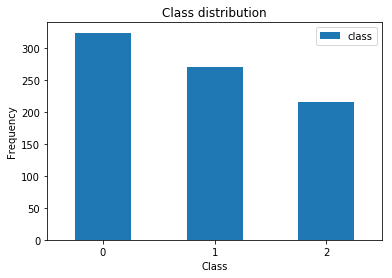

Zeros:  40  %
Ones:  32  %
Twos:  28 %


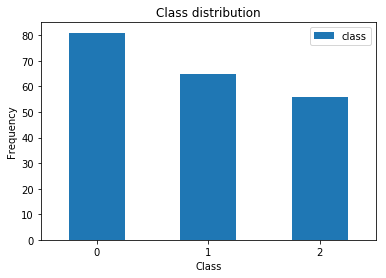

[81, 65, 56]

In [69]:
class_distr(y_mean_min_max_train)
class_distr(y_mean_min_max_test)

Zeros:  40  %
Ones:  34  %
Twos:  26 %


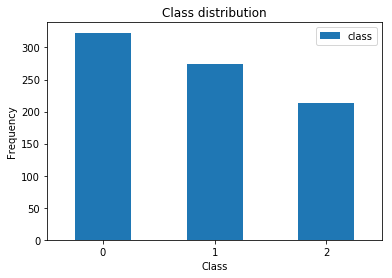

Zeros:  41  %
Ones:  31  %
Twos:  29 %


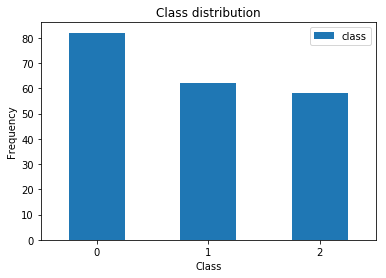

[82, 62, 58]

In [70]:
class_distr(y_median_min_max_train)
class_distr(y_median_min_max_test)

Zeros:  40  %
Ones:  33  %
Twos:  27 %


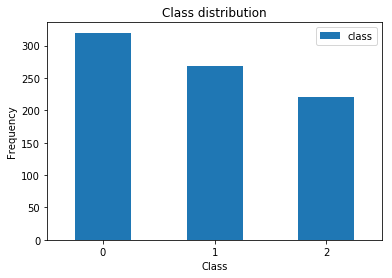

Zeros:  42  %
Ones:  33  %
Twos:  25 %


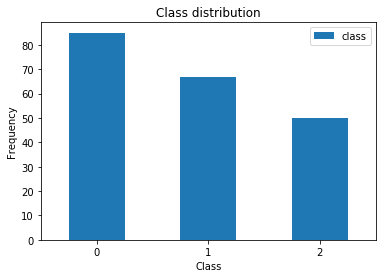

[85, 67, 50]

In [71]:
class_distr(y_regression_min_max_train)
class_distr(y_regression_min_max_test)

Zeros:  41  %
Ones:  32  %
Twos:  26 %


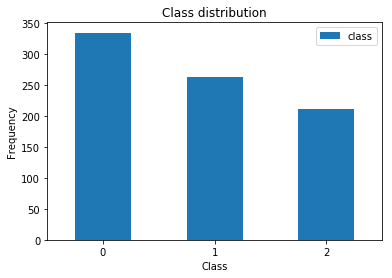

Zeros:  35  %
Ones:  36  %
Twos:  29 %


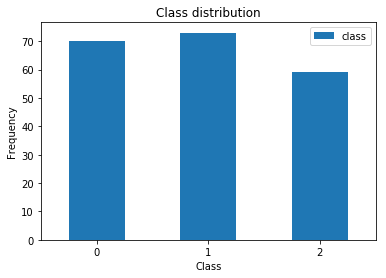

[70, 73, 59]

In [72]:
class_distr(y_mean_standard_train)
class_distr(y_mean_standard_test)

Zeros:  40  %
Ones:  33  %
Twos:  27 %


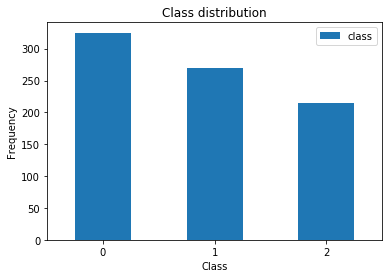

Zeros:  40  %
Ones:  33  %
Twos:  28 %


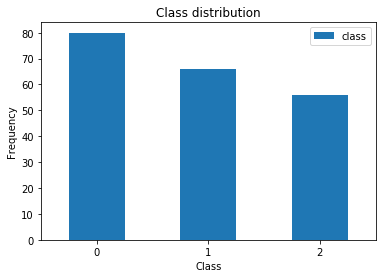

[80, 66, 56]

In [73]:
class_distr(y_median_standard_train)
class_distr(y_median_standard_test)

Zeros:  41  %
Ones:  33  %
Twos:  26 %


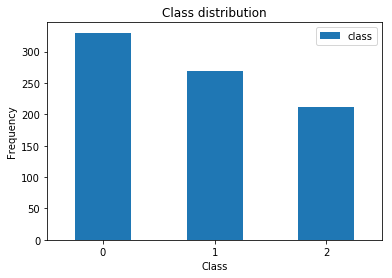

Zeros:  37  %
Ones:  33  %
Twos:  30 %


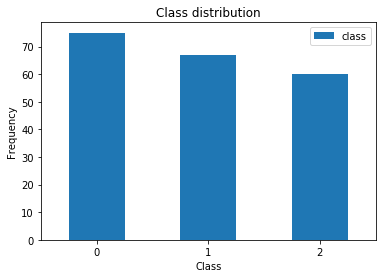

[75, 67, 60]

In [74]:
class_distr(y_regression_standard_train)
class_distr(y_regression_standard_test)

Sprawdzene systrybucji klas (oryginalna: Zeros:  40  % Ones:  33  % Twos:  27 %)

# Miary

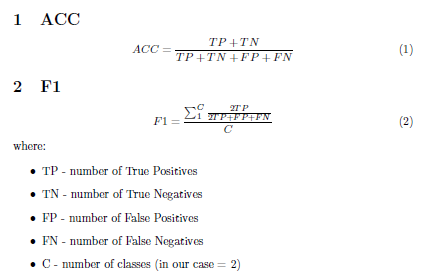

In [75]:
Image(r"M:\DOKUMENTY\STUDIA\PK\WIiT\II\MOW2\materialy\ACC_F1.png")

In [76]:
def return_ACC(cm, results):
    acc = (sum(cm.diagonal()))/(sum(sum(cm)))
    results.append(acc)
    return acc

def return_F1(cm, results, method):

    f1 = []
# #Precision: Correct positive predictions relative to total positive predictions
# #Recall: Correct positive predictions relative to total actual positives

    for i in range(len(cm)):
        Precision =  cm[i][i]/sum(cm[i])
        Recall = cm[i][i]/sum([row[i] for row in cm])
    
        f1_sub = 2 * (Precision * Recall) / (Precision + Recall)
        f1.append(f1_sub)
        
    if method == "avg":
        f1 = sum(f1)/len(f1) 
        
    results.append(f1)
    return f1

In [77]:
def plot_conf_matrix(y_test, pr, title):
    cm = metrics.confusion_matrix(y_test, pr)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('RiskLevel');
    plt.xlabel('Predicted RiskLevel');
    plt.title('Macierz pomyłek dla ' + title)
    return cm

In [78]:
acc_results = []
f1_results = []

# Logistic Regression
    

## mean

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACC:  0.658415841584 sklearn ACC:  0.658415841584
F1:  0.631580820943 sklearn F1:  0.631580820943


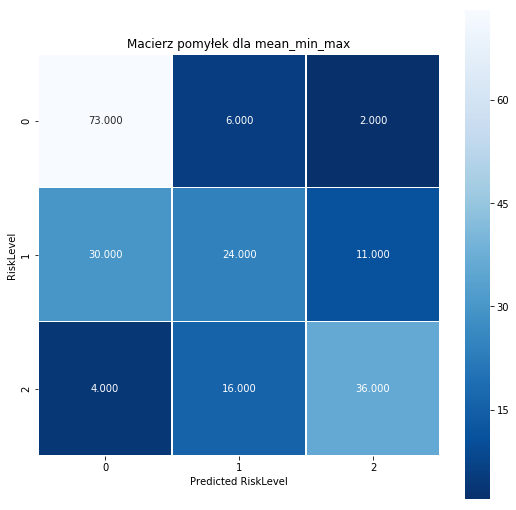

In [79]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_mean_min_max_train, y_mean_min_max_train)
predictions = logisticRegr.predict(X_mean_min_max_test)

cm = plot_conf_matrix(y_mean_min_max_test, predictions, "mean_min_max")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_mean_min_max_test, predictions))
print("F1: ", return_F1(cm, f1_results,"avg") , "sklearn F1: ", metrics.f1_score(y_mean_min_max_test, predictions, average="macro"))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACC:  0.59900990099 sklearn ACC:  0.59900990099
F1:  0.588957657923 sklearn F1:  0.588957657923


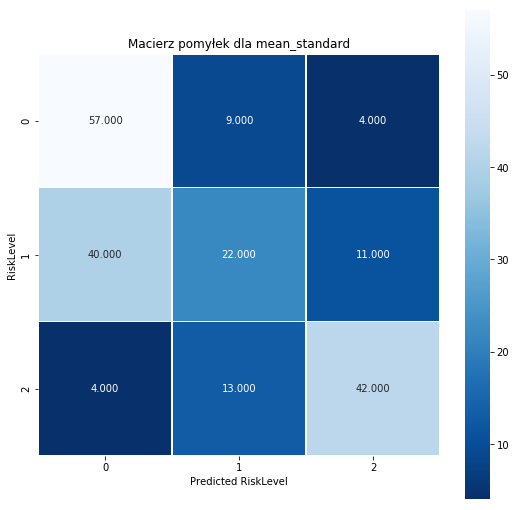

In [80]:
logisticRegr.fit(X_mean_standard_train, y_mean_standard_train)
predictions = logisticRegr.predict(X_mean_standard_test)

cm = plot_conf_matrix(y_mean_standard_test, predictions, "mean_standard")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_mean_standard_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_mean_standard_test, predictions, average="macro"))

## median

ACC:  0.633663366337 sklearn ACC:  0.633663366337
F1:  0.610292397661 sklearn F1:  0.610292397661


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


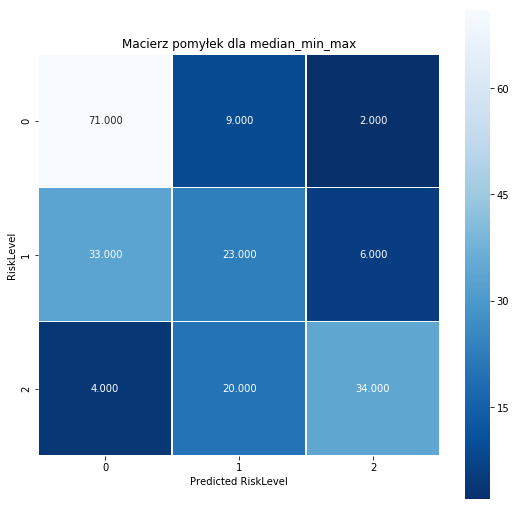

In [81]:
logisticRegr.fit(X_median_min_max_train, y_median_min_max_train)
predictions = logisticRegr.predict(X_median_min_max_test)

cm = plot_conf_matrix(y_median_min_max_test, predictions, "median_min_max")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_median_min_max_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_median_min_max_test, predictions, average="macro"))

ACC:  0.643564356436 sklearn ACC:  0.643564356436
F1:  0.626907063466 sklearn F1:  0.626907063466


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


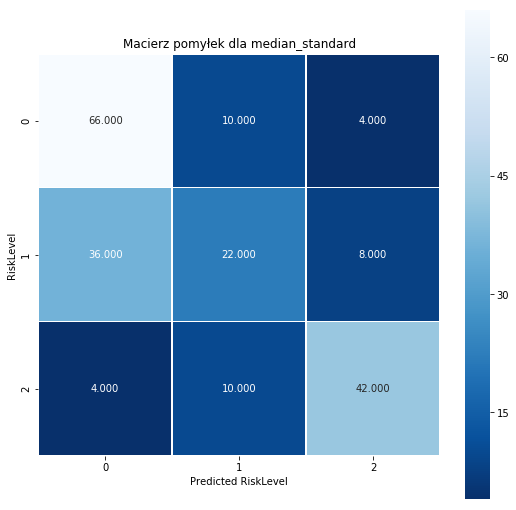

In [82]:
logisticRegr.fit(X_median_standard_train, y_median_standard_train)
predictions = logisticRegr.predict(X_median_standard_test)

cm = plot_conf_matrix(y_median_standard_test, predictions, "median_standard")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_median_standard_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_median_standard_test, predictions, average="macro"))

## regression

ACC:  0.663366336634 sklearn ACC:  0.663366336634
F1:  0.64376384386 sklearn F1:  0.64376384386


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


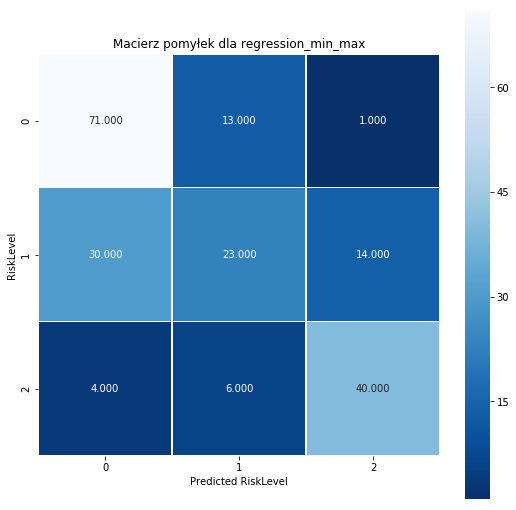

In [83]:
logisticRegr.fit(X_regression_min_max_train, y_regression_min_max_train)
predictions = logisticRegr.predict(X_regression_min_max_test)

cm = plot_conf_matrix(y_regression_min_max_test, predictions, "regression_min_max")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_regression_min_max_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_regression_min_max_test, predictions, average="macro"))

ACC:  0.663366336634 sklearn ACC:  0.663366336634
F1:  0.646226737867 sklearn F1:  0.646226737867


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


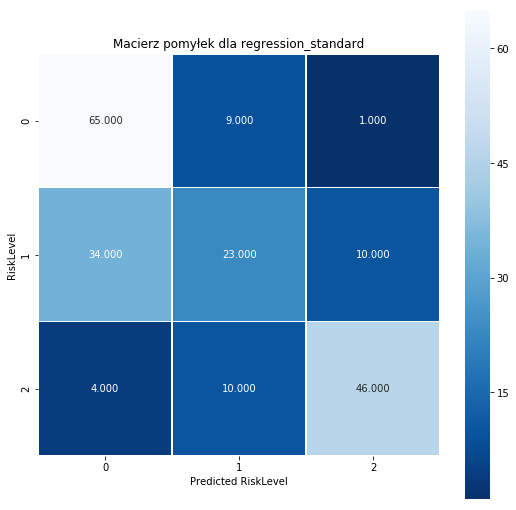

In [84]:
logisticRegr.fit(X_regression_standard_train, y_regression_standard_train)
predictions = logisticRegr.predict(X_regression_standard_test)

cm = plot_conf_matrix(y_regression_standard_test, predictions, "regression_standard")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_regression_standard_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_regression_standard_test, predictions, average="macro"))

# DecisionTreeClassifier

## mean

ACC:  0.826732673267 sklearn ACC:  0.826732673267
F1:  0.832137607453 sklearn F1:  0.832137607453


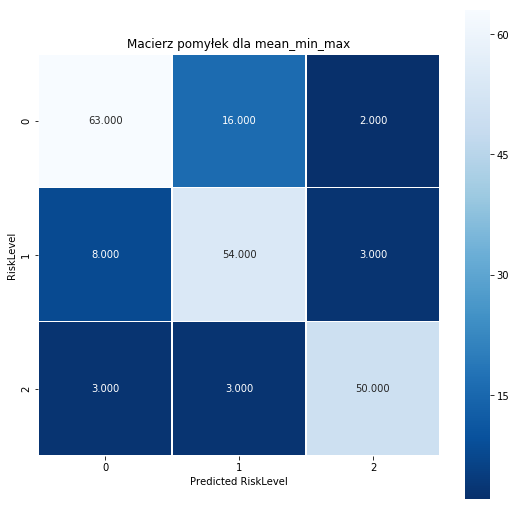

In [85]:
DTC = DecisionTreeClassifier()
DTC.fit(X_mean_min_max_train, y_mean_min_max_train)
predictions = DTC.predict(X_mean_min_max_test)

cm = plot_conf_matrix(y_mean_min_max_test, predictions, "mean_min_max")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_mean_min_max_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_mean_min_max_test, predictions, average="macro"))

ACC:  0.79702970297 sklearn ACC:  0.79702970297
F1:  0.799053144327 sklearn F1:  0.799053144327


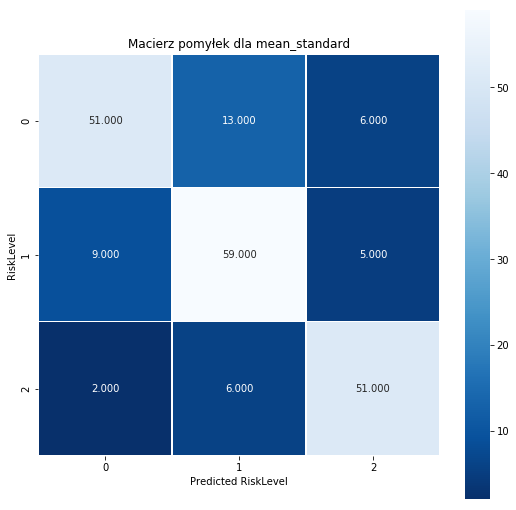

In [86]:
DTC.fit(X_mean_standard_train, y_mean_standard_train)
predictions = DTC.predict(X_mean_standard_test)

cm = plot_conf_matrix(y_mean_standard_test, predictions, "mean_standard")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_mean_standard_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_mean_standard_test, predictions, average="macro"))

## median

ACC:  0.806930693069 sklearn ACC:  0.806930693069
F1:  0.809354198119 sklearn F1:  0.809354198119


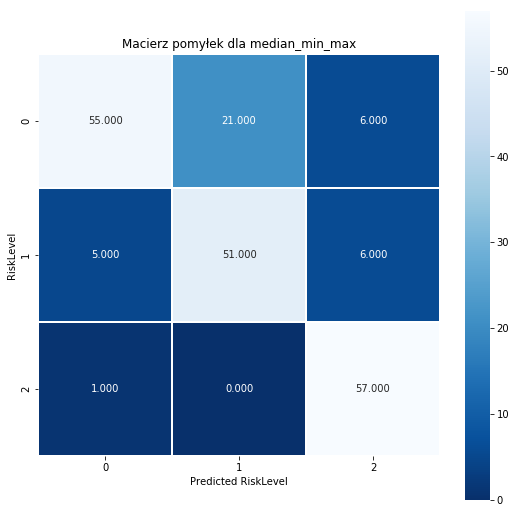

In [87]:
DTC.fit(X_median_min_max_train, y_median_min_max_train)
predictions = DTC.predict(X_median_min_max_test)

cm = plot_conf_matrix(y_median_min_max_test, predictions, "median_min_max")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_median_min_max_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_median_min_max_test, predictions, average="macro"))

ACC:  0.787128712871 sklearn ACC:  0.787128712871
F1:  0.798640039206 sklearn F1:  0.798640039206


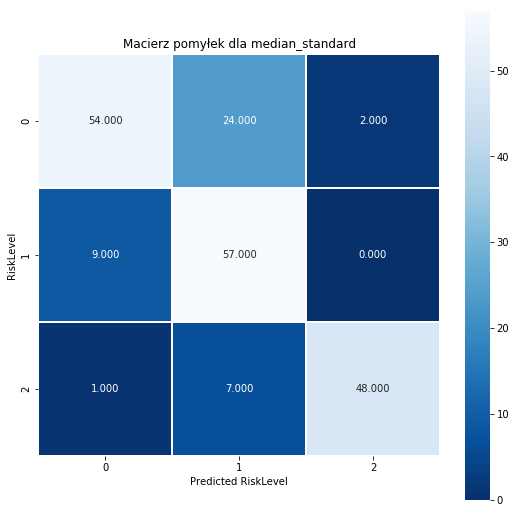

In [88]:
DTC.fit(X_median_standard_train, y_median_standard_train)
predictions = DTC.predict(X_median_standard_test)

cm = plot_conf_matrix(y_median_standard_test, predictions, "median_standard")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_median_standard_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_median_standard_test, predictions, average="macro"))

## regression


ACC:  0.846534653465 sklearn ACC:  0.846534653465
F1:  0.852997451644 sklearn F1:  0.852997451644


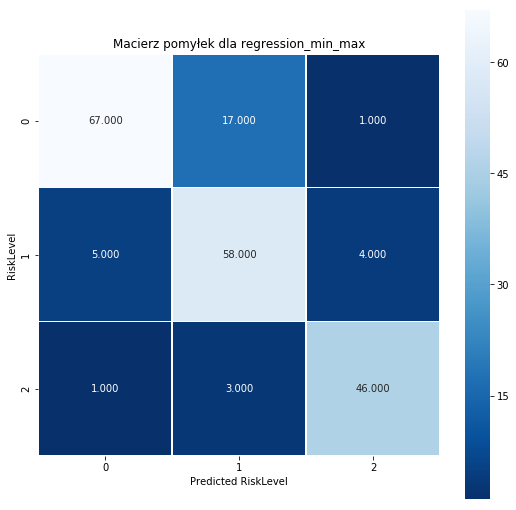

In [89]:
DTC.fit(X_regression_min_max_train, y_regression_min_max_train)
predictions = DTC.predict(X_regression_min_max_test)

cm = plot_conf_matrix(y_regression_min_max_test, predictions, "regression_min_max")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_regression_min_max_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_regression_min_max_test, predictions, average="macro"))

ACC:  0.826732673267 sklearn ACC:  0.826732673267
F1:  0.831187203601 sklearn F1:  0.831187203601


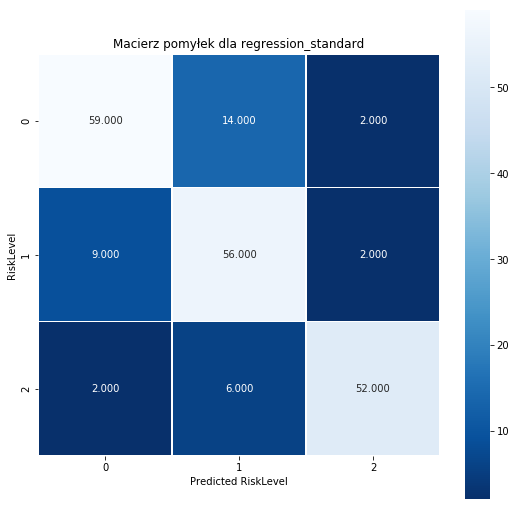

In [90]:
DTC.fit(X_regression_standard_train, y_regression_standard_train)
predictions = DTC.predict(X_regression_standard_test)

cm = plot_conf_matrix(y_regression_standard_test, predictions, "regression_standard")

print("ACC: ", return_ACC(cm, acc_results) , "sklearn ACC: ", metrics.accuracy_score(y_regression_standard_test, predictions))
print("F1: ", return_F1(cm, f1_results, "avg") , "sklearn F1: ", metrics.f1_score(y_regression_standard_test, predictions, average="macro"))

In [91]:
classifiers = ['Logistic Regression Mean Min_Max', 'Logistic Regression Mean Standard', 'Logistic Regression Median Min_Max',  'Logistic Regression Median Standard',  'Logistic Regression Regression Min_Max',  'Logistic Regression Regression Standard', 'Decission Tree Mean Min_Max', 'Decission Tree Mean Standard', 'Decission Tree Median Min_Max',  'Decission Tree Median Standard',  'Decission Tree Regression Min_Max',  'Decission Tree Regression Standard']

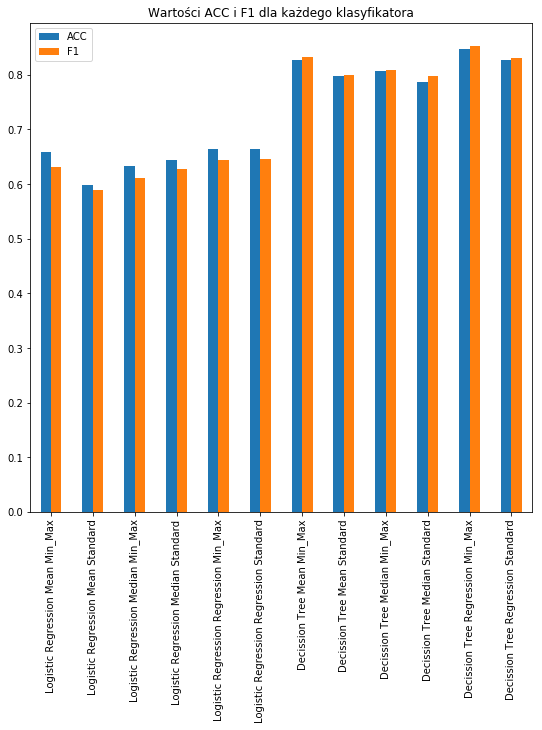

In [92]:

df_results = pd.DataFrame({'ACC': acc_results, 'F1': f1_results}, index=classifiers)
ax = df_results.plot.bar(figsize=(9,9))
plt.title("Wartości ACC i F1 dla każdego klasyfikatora")

# ------------ część 3. ------------------

# walidacja krzyżowa 

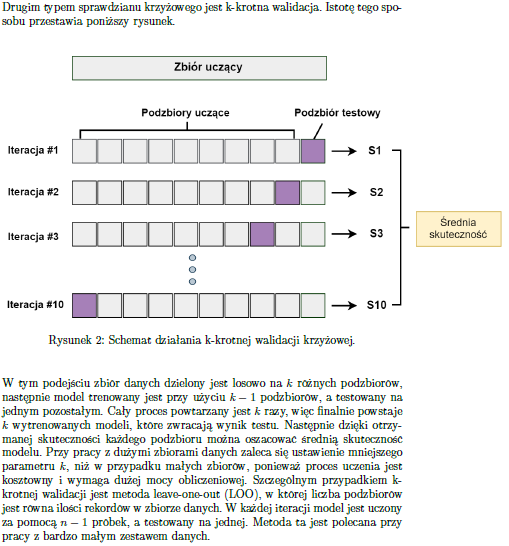

In [93]:
Image(r"M:\DOKUMENTY\STUDIA\PK\WIiT\II\MOW2\materialy\Cross.png")

In [94]:
acc_results_cross_val_sub = []
f1_results_cross_val_sub = []


In [95]:
def cross_val(df, k, classifier):
    if (k>len(df)):
        print("K > len(df)")
        return 0
        
    ACC = []
    F1 = []
    
    for i in range(k):
        begin_test =round( (len(df)/k)*i)
        end_test = round((len(df)/k)*i + len(df)/k)
        
        df_test = df[begin_test:end_test]
        df_train = df[0:begin_test].append(df[end_test:len(df)])
        
        X_df_test, y_df_test  = X_y_split(df_test,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])
        X_df_train, y_df_train = X_y_split(df_train,['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],['RiskLevel'])
        
        classifier.fit(X_df_train, y_df_train)
        predictions = classifier.predict(X_df_test)
        
        cm = metrics.confusion_matrix(y_df_test, predictions)
        ACC.append(return_ACC(cm, acc_results_cross_val_sub))
        F1.append(return_F1(cm, f1_results_cross_val_sub,"avg"))
        
        
#         print("ACC: ", return_ACC(cm, acc_results_cross_val_sub) , "sklearn ACC: ", metrics.accuracy_score(y_df_test, predictions))
#         print("F1: ", return_F1(cm, f1_results_cross_val_sub,"avg") , "sklearn F1: ", metrics.f1_score(y_df_test, predictions, average="macro"))
    ACC_avg = sum(ACC)/len(ACC)
    F1_avg = sum(F1)/len(F1)
    
#     print("ACC.avg", ACC_avg)
#     print("F1.avg", F1_avg)
    
    return {"ACC":ACC_avg, "F1":F1_avg}

Zbiory danych:

df_mean_min_max
df_median_min_max
df_regression_min_max
df_mean_standard
df_median_standard
df_regression_standard

In [96]:
results = {}

In [97]:
results["LogisticRegression_mean_min_max"] = cross_val(df_mean_min_max, 3, logisticRegr)
results["LogisticRegression_median_min_max"] = cross_val(df_median_min_max, 3, logisticRegr)
results["LogisticRegression_regression_min_max"] = cross_val(df_regression_min_max, 3, logisticRegr)
results["LogisticRegression_mean_standard"] = cross_val(df_mean_standard, 3, logisticRegr)
results["LogisticRegression_median_standard"] = cross_val(df_median_standard, 3, logisticRegr)
results["LogisticRegression_regression_standard"] = cross_val(df_regression_standard, 3, logisticRegr)

results["DecissionTree_mean_min_max"] = cross_val(df_mean_min_max, 3, DTC)
results["DecissionTree_median_min_max"] = cross_val(df_median_min_max, 3, DTC)
results["DecissionTree_regression_min_max"] = cross_val(df_regression_min_max, 3, DTC)
results["DecissionTree_mean_standard"] = cross_val(df_mean_standard, 3, DTC)
results["DecissionTree_median_standard"] = cross_val(df_median_standard, 3, DTC)
results["DecissionTree_regression_standard"] = cross_val(df_regression_standard, 3, DTC)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
# ACCs = [ i["ACC"] for i in np. array(list(results.values()))]
# F1s = [ i["F1"] for i in np. array(list(results.values()))]
# indexes_plt = [ i for i in np. array(list(results.keys()))]

# df_results_all = pd.DataFrame({'ACC': ACCs, 'F1': F1s}, index=indexes_plt)
# ax = df_results_all.plot.bar(figsize=(9,9))
# plt.title("Wartości ACC i F1 dla każdego klasyfikatora (walidacja krzyżowa)")

# dodatkowe klasyfikatory

## Algorytm k-najbliższych sąsiadów

In [99]:
KN = KNeighborsClassifier(n_neighbors=3)

results[" KNeighbors_mean_min_max"] = cross_val(df_mean_min_max, 3, KN)
results[" KNeighbors_median_min_max"] = cross_val(df_median_min_max, 3, KN)
results[" KNeighbors_regression_min_max"] = cross_val(df_regression_min_max, 3, KN)
results[" KNeighbors_mean_standard"] = cross_val(df_mean_standard, 3, KN)
results[" KNeighbors_median_standard"] = cross_val(df_median_standard, 3, KN)
results[" KNeighbors_regression_standard"] = cross_val(df_regression_standard, 3, KN)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [100]:
# ACCs = [ i["ACC"] for i in np. array(list(results.values()))]
# F1s = [ i["F1"] for i in np. array(list(results.values()))]
# indexes_plt = [ i for i in np. array(list(results.keys()))]

# df_results_all = pd.DataFrame({'ACC': ACCs, 'F1': F1s}, index=indexes_plt)
# ax = df_results_all.plot.bar(figsize=(9,9))
# plt.title("Wartości ACC i F1 dla każdego klasyfikatora (walidacja krzyżowa)")

## Las losowy


In [101]:
RF = RandomForestClassifier(max_depth=3, random_state=0)

results[" RandomForest_mean_min_max"] = cross_val(df_mean_min_max, 3, RF)
results[" RandomForest_median_min_max"] = cross_val(df_median_min_max, 3, RF)
results[" RandomForest_regression_min_max"] = cross_val(df_regression_min_max, 3, RF)
results[" RandomForest_mean_standard"] = cross_val(df_mean_standard, 3, RF)
results[" RandomForest_median_standard"] = cross_val(df_median_standard, 3, RF)
results[" RandomForest_regression_standard"] = cross_val(df_regression_standard, 3, RF)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

In [102]:
# ACCs = [ i["ACC"] for i in np. array(list(results.values()))]
# F1s = [ i["F1"] for i in np. array(list(results.values()))]
# indexes_plt = [ i for i in np. array(list(results.keys()))]

# df_results_all = pd.DataFrame({'ACC': ACCs, 'F1': F1s}, index=indexes_plt)
# ax = df_results_all.plot.bar(figsize=(9,9))
# plt.title("Wartości ACC i F1 dla każdego klasyfikatora (walidacja krzyżowa)")

## Maszyna wektorów nośnych (SVM)

In [103]:
SVM = svm.SVC()
results[" SupportVectorMachines_mean_min_max"] = cross_val(df_mean_min_max, 3, SVM)
results[" SupportVectorMachines_median_min_max"] = cross_val(df_median_min_max, 3, SVM)
results[" SupportVectorMachines_regression_min_max"] = cross_val(df_regression_min_max, 3, SVM)
results[" SupportVectorMachines_mean_standard"] = cross_val(df_mean_standard, 3, SVM)
results[" SupportVectorMachines_median_standard"] = cross_val(df_median_standard, 3, SVM)
results[" SupportVectorMachines_regression_standard"] = cross_val(df_regression_standard, 3, SVM)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
# ACCs = [ i["ACC"] for i in np. array(list(results.values()))]
# F1s = [ i["F1"] for i in np. array(list(results.values()))]
# indexes_plt = [ i for i in np. array(list(results.keys()))]

# df_results_all = pd.DataFrame({'ACC': ACCs, 'F1': F1s}, index=indexes_plt)
# ax = df_results_all.plot.bar(figsize=(9,9))
# plt.title("Wartości ACC i F1 dla każdego klasyfikatora (walidacja krzyżowa)")

# porównanie wyników

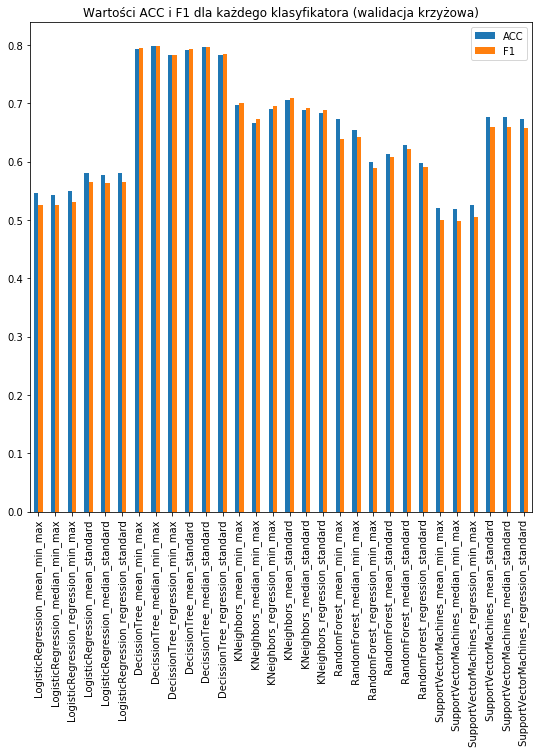

In [105]:
ACCs = [ i["ACC"] for i in np. array(list(results.values()))]
F1s = [ i["F1"] for i in np. array(list(results.values()))]
indexes_plt = [ i for i in np. array(list(results.keys()))]

df_results_all = pd.DataFrame({'ACC': ACCs, 'F1': F1s}, index=indexes_plt)
ax = df_results_all.plot.bar(figsize=(9,9))
plt.title("Wartości ACC i F1 dla każdego klasyfikatora (walidacja krzyżowa)")

In [106]:
display(df_results_all)

,ACC,F1
LogisticRegression_mean_min_max,0.546395,0.526507
LogisticRegression_median_min_max,0.543433,0.525561
LogisticRegression_regression_min_max,0.549359,0.530132
LogisticRegression_mean_standard,0.580034,0.565344
LogisticRegression_median_standard,0.577066,0.563407
LogisticRegression_regression_standard,0.581014,0.565569
DecissionTree_mean_min_max,0.793485,0.795421
DecissionTree_median_min_max,0.798436,0.798716
DecissionTree_regression_min_max,0.782601,0.783429
DecissionTree_mean_standard,0.791506,0.793552


In [110]:
display(df_results_all.sort_values('ACC', ascending = False))

,ACC,F1
DecissionTree_median_min_max,0.798436,0.798716
DecissionTree_median_standard,0.796464,0.797180
DecissionTree_mean_min_max,0.793485,0.795421
DecissionTree_mean_standard,0.791506,0.793552
DecissionTree_regression_standard,0.783599,0.784686
DecissionTree_regression_min_max,0.782601,0.783429
KNeighbors_mean_standard,0.706492,0.708374
KNeighbors_mean_min_max,0.696612,0.699873
KNeighbors_regression_min_max,0.689700,0.694657
KNeighbors_median_standard,0.688694,0.691656


In [111]:
display(df_results_all.sort_values('F1', ascending = False))

,ACC,F1
DecissionTree_median_min_max,0.798436,0.798716
DecissionTree_median_standard,0.796464,0.797180
DecissionTree_mean_min_max,0.793485,0.795421
DecissionTree_mean_standard,0.791506,0.793552
DecissionTree_regression_standard,0.783599,0.784686
DecissionTree_regression_min_max,0.782601,0.783429
KNeighbors_mean_standard,0.706492,0.708374
KNeighbors_mean_min_max,0.696612,0.699873
KNeighbors_regression_min_max,0.689700,0.694657
KNeighbors_median_standard,0.688694,0.691656
